In [3]:
# All ticket (not closed) in Metrics components
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&component=%5EMetrics&col=id&col=summary&col=status&col=type&col=priority&col=milestone&col=component&order=priority

csv_path='/Users/gaba/Code/torproject/trac/datasets/MetricsComponent-Tickets-May-2019.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)


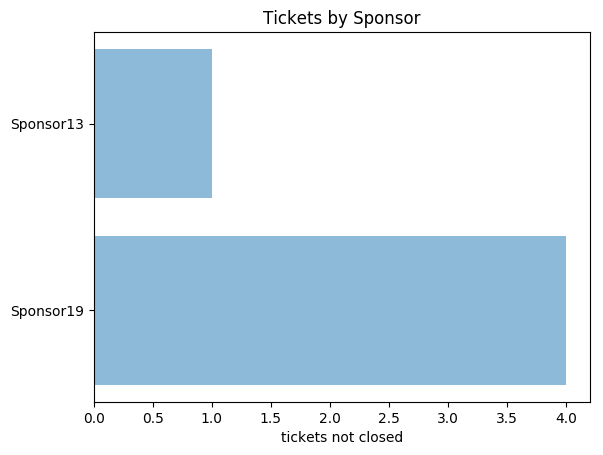

In [22]:
# which sponsors we have tickets for
sponsors_by_tickets_closed = csv_file['Sponsor'].value_counts()

objects = tuple(sponsors_by_tickets_closed.keys())
y_pos = np.arange(len(objects))
performance = list(sponsors_by_tickets_closed)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets not closed')
plt.title('Tickets by Sponsor')

plt.show()

In [5]:
# who closed tickets
csv_file['Owner'].value_counts()

metrics-team    284
tom              13
karsten           6
irl               4
acute             2
wulder            1
Name: Owner, dtype: int64

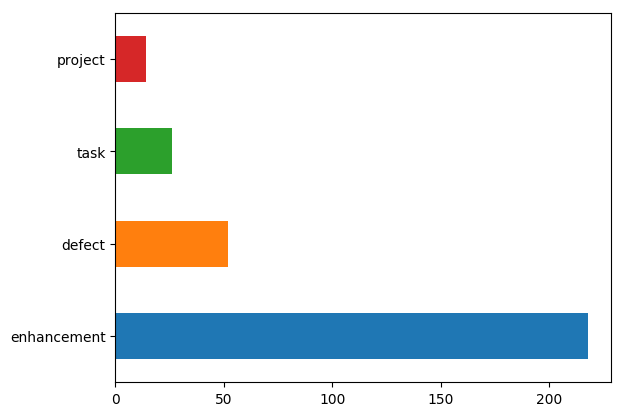

In [6]:
# What type of tickets we got
csv_file['Type'].value_counts().plot.barh()

In [7]:
# How many high and very high tickets
csv_file['Priority'].value_counts()

Medium       252
Low           45
High           7
Very Low       4
Very High      2
Name: Priority, dtype: int64

In [8]:
# which milestone the tickets are for
csv_file['Milestone'].value_counts()

Onionoo 2.0.0        3
metrics-lib 3.0.0    2
CollecTor 1.7.0      1
CollecTor 2.0.0      1
Metrics 1.0.0        1
Name: Milestone, dtype: int64

In [9]:
# How many 'big' tickets we have
csv_file['Points'].value_counts()


0.2     7
1.0     7
8.0     4
3.0     4
0.5     3
0.1     2
2.0     2
0.0     1
6.0     1
21.0    1
10.0    1
Name: Points, dtype: int64

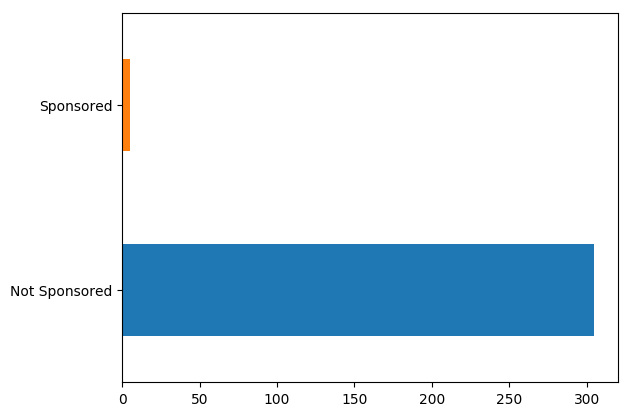

In [13]:
# How much work is not sponsored

sponsor_and_not = csv_file['Sponsor'].notnull().value_counts().rename(lambda x: 'Sponsored' if x else 'Not Sponsored')

sponsor_and_not.plot.barh()


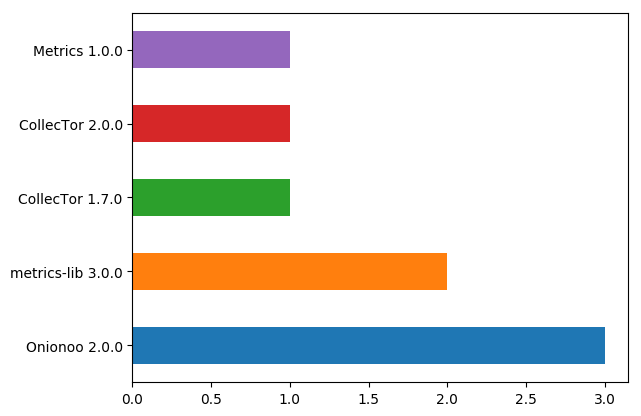

In [14]:
# From all not sponsored work which release they are going into

not_sponsored_work = csv_file[csv_file.Sponsor.isnull()]
not_sponsored_work['Milestone'].value_counts().plot.barh()


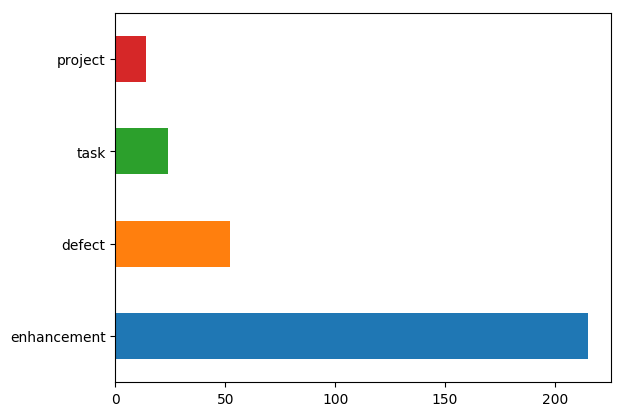

In [15]:
# What is this non sponsored work

not_sponsored_work['Type'].value_counts().plot.barh()

In [17]:
not_sponsored_work.query('Type=="enhancement"')



,id,Summary,Component,Status,Owner,Type,Priority,Milestone,Version,Severity,Resolution,Created,Modified,Actual Points,Parent ID,Points,Reviewer,Sponsor,Reporter,Keywords
0,29315,Write down guidelines for adding new stats,Metrics/Website,accepted,irl,enhancement,Very High,NaN,NaN,Normal,NaN,3 feb. 2019 20:15:10,25 abr. 2019 10:40:30,NaN,NaN,3.0,NaN,NaN,karsten,metrics-roadmap-2019-q2
9,4943,Make network graphs with X / consensus weight?,Metrics/Website,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,22 ene. 2012 12:46:08,6 dic. 2017 04:50:54,NaN,NaN,NaN,NaN,NaN,Sebastian,NaN
10,8105,Provide an overview of Analysis ticket results...,Metrics/Analysis,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,30 ene. 2013 13:39:31,6 dic. 2017 04:50:54,NaN,NaN,NaN,NaN,NaN,karsten,NaN
11,9778,Add votes document type,Metrics/Onionoo,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,19 sep. 2013 10:09:37,20 sep. 2017 13:38:20,NaN,NaN,NaN,NaN,NaN,karsten,NaN
12,10222,Implement network wide and router specific vie...,Metrics/Analysis,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,23 nov. 2013 09:47:29,6 dic. 2017 04:50:54,NaN,NaN,NaN,NaN,NaN,anon,nickm-cares
13,10223,Add BGP route attack email notification servic...,Metrics/Ideas,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,23 nov. 2013 09:55:24,28 sep. 2017 13:57:28,NaN,NaN,NaN,NaN,NaN,anon,nickm-cares
14,10680,Provide more statistics on current public bridges,Metrics/Statistics,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,20 ene. 2014 21:37:22,28 sep. 2017 13:57:28,NaN,NaN,NaN,NaN,NaN,sysrqb,bridgedb-parsers
15,11430,"Add new field last_running for ""seen in a netw...",Metrics/Onionoo,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,7 abr. 2014 16:19:59,6 dic. 2017 04:50:54,NaN,NaN,NaN,NaN,NaN,karsten,NaN
17,12522,Add sitemap.xml to make Relay Search pages ind...,Metrics/Website,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,3 jul. 2014 12:05:13,16 feb. 2018 14:44:23,NaN,NaN,NaN,NaN,NaN,karsten,metrics-2018
18,13424,Add new `descriptor` parameter that returns re...,Metrics/Onionoo,assigned,metrics-team,enhancement,Medium,NaN,NaN,Normal,NaN,15 oct. 2014 14:50:17,6 dic. 2017 04:50:54,NaN,NaN,NaN,NaN,NaN,karsten,NaN


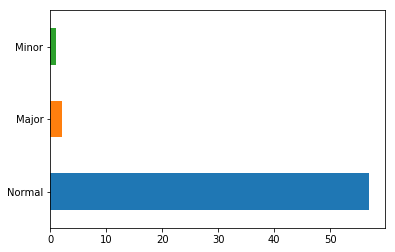

In [33]:
# Severity for non sponsored work
not_sponsored_work.query('Type=="defect"')['Severity'].value_counts().plot.barh()

In [19]:
not_sponsored_work.query('Type=="defect"').query('Severity=="Major"')

,id,Summary,Component,Status,Owner,Type,Priority,Milestone,Version,Severity,Resolution,Created,Modified,Actual Points,Parent ID,Points,Reviewer,Sponsor,Reporter,Keywords
33,18167,"Don't trust ""bridge-ips"" blindly for user numb...",Metrics/Statistics,assigned,metrics-team,defect,Medium,NaN,NaN,Major,NaN,27 ene. 2016 19:38:36,28 sep. 2017 13:57:28,NaN,NaN,NaN,NaN,NaN,karsten,"meek, metrics-2018"
218,28681,reflected XSS metrics.torproject.org,Metrics/Relay Search,new,metrics-team,defect,Medium,NaN,NaN,Major,NaN,2 dic. 2018 07:41:05,3 dic. 2018 19:07:50,NaN,NaN,NaN,NaN,NaN,0x539h,"xss, cross-site scripting"
258,30544,Using try-with-resources or close resource,Metrics/Library,new,metrics-team,defect,Medium,NaN,NaN,Major,NaN,21 may. 2019 03:27:38,21 may. 2019 07:08:20,NaN,NaN,NaN,NaN,NaN,fava,NaN


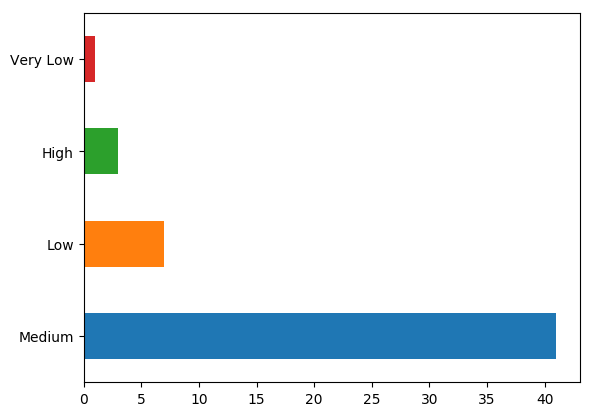

In [20]:
not_sponsored_work.query('Type=="defect"')['Priority'].value_counts().plot.barh()

In [21]:
not_sponsored_work.query('Type=="defect"').query('Priority=="High"')

,id,Summary,Component,Status,Owner,Type,Priority,Milestone,Version,Severity,Resolution,Created,Modified,Actual Points,Parent ID,Points,Reviewer,Sponsor,Reporter,Keywords
4,29458,Make sure that op-hk (and the other instances)...,Metrics/Onionperf,new,metrics-team,defect,High,NaN,NaN,Normal,NaN,11 feb. 2019 09:44:13,1 may. 2019 08:03:49,NaN,NaN,NaN,NaN,NaN,karsten,NaN
7,30351,Unknown error in prepare_* functions using the...,Metrics/Website,new,metrics-team,defect,High,NaN,NaN,Normal,NaN,1 may. 2019 13:41:45,13 may. 2019 10:22:55,NaN,NaN,NaN,NaN,NaN,karsten,NaN
8,30499,"In Tor Metrics / Relay Search, users are able ...",Metrics/Relay Search,new,metrics-team,defect,High,NaN,NaN,Normal,NaN,13 may. 2019 23:14:27,13 may. 2019 23:14:27,NaN,NaN,NaN,NaN,NaN,monmire,Relay-Search-accepts-bridge-digital-signature ...


In [23]:
# Analyize keywords
csv_file['Keywords']

# How old are the tickets

0                                metrics-roadmap-2019-q2
1                                                    NaN
2                                metrics-roadmap-2019-q2
3                                metrics-roadmap-2019-q2
4                                                    NaN
5                                metrics-roadmap-2019-q2
6                                metrics-roadmap-2019-q2
7                                                    NaN
8      Relay-Search-accepts-bridge-digital-signature ...
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                           nickm-cares
13                                           nickm-cares
14                                      bridgedb-parsers
15                                                   NaN
16                                                   NaN
17                             